# Data Preprocessing

In [243]:
import pandas as pd
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

### Original data format

In [244]:
df_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [245]:
df_test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Rosenbaum, Miss. Edith Louise",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN


### Convert text format column to integer class

In [246]:
# Sex : male -> 0, female -> 1
for df in [df_train, df_test]:
    df.loc[ df["Sex"] == "male", "Sex"] = 0
    df.loc[ df["Sex"] == "female", "Sex"] = 1
    df["Sex"] = df["Sex"].astype(int)

In [247]:
# Embarked : S -> 0, Q -> 1, C -> 2
for df in [df_train, df_test]:
    df.loc[ df["Embarked"] == "S", "Embarked"] = 0
    df.loc[ df["Embarked"] == "Q", "Embarked"] = 1
    df.loc[ df["Embarked"] == "C", "Embarked"] = 2
    df["Embarked"] = df["Embarked"].fillna(0)  # because S is most frequent
    df["Embarked"] = df["Embarked"].astype(int)

### Fill nan value by mean of column

In [248]:
for df in [df_train, df_test]:
    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

### See feature relation
>Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

In [215]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.013128
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.167675
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.162098
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.026749
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.068230
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.039798
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.224719
Embarked,-0.013128,0.167675,-0.162098,0.108262,0.026749,-0.068230,-0.039798,0.224719,1.000000


# Solution

### Drop unnecessary column (unneccesary for learning)
- PasserngerId
- Survived (target feature)
- Name (text format column)
- Ticket (text format column
- Cabin

In [250]:
df_trainX = df_train.drop(["PassengerId", "Survived","Name", "Ticket", "Cabin"], axis=1)
df_testX = df_test.drop(["PassengerId","Name", "Ticket", "Cabin"], axis=1)

### Convert data format

In [251]:
from keras.utils import np_utils
trainX = df_trainX.as_matrix()
testX = df_testX.as_matrix()
norm_trainX = df_norm_trainX.as_matrix()
norm_testX = df_norm_testX.as_matrix()
trainy = df_train["Survived"].as_matrix()
trainY = np_utils.to_categorical(trainy, 2)

### Training forest

In [257]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest = forest.fit(trainX, trainY)

### See training error

In [108]:
import numpy as np
prediction = forest.predict(trainX)
correct_num = len([match for match in np.argmax(prediction, axis=1) == trainy if match])
correct_rate = correct_num * 1.0 / trainX.shape[0]
print "Accuracy on training set = %f" % correct_rate

Accuracy on training set = 0.961841


### See test error by submitting answer

In [132]:
test_prediction = forest.predict(testX)
one_hot = np.argmax(test_prediction, axis=1)
test_passenger_ids = df_test["PassengerId"].as_matrix()
ans = [[pid, pred] for pid, pred in zip(test_passenger_ids, one_hot)]
np.savetxt("forest_ans.csv", np.array(ans), fmt="%d", header="PassengerId,Survived")

`>> score = 0.78469`  
Overfitting ...

### See feature importance

In [148]:
feature_names = list(df_trainX.columns.values)
for name, importance in zip(feature_names, forest.feature_importances_):
    print "%s = %f" % (name, importance)

Pclass = 0.087191
Sex = 0.230376
Age = 0.277852
SibSp = 0.049041
Parch = 0.053136
Fare = 0.265980
Embarked = 0.036424


# Create additioncal features

### Focus on "Ticket" feature
- some of tickets are digit like "5727", "349210"
- some of tickets have string prefix  like "S.O.C. 14879"," A/5 3536"

### See difference between digit and non-digit tickets 

#### See if digit or non-digit ticket effect to passenger's survival
- no effect...

In [220]:
tnum = df_train[["Survived", "Ticket"]] .as_matrix()
digit_ticket = np.array([[int(s), int(t)] for s,t in tnum if t.isdigit()])
nondigit_ticket = np.array([[int(s), t] for s,t in tnum if not t.isdigit()])
print "entire survival rate=%f"  % df_train["Survived"].as_matrix().mean()
print "digit ticket's survival rate=%f" % (digit_ticket[digit_ticket[:, 0] == 1].size*1.0/digit_ticket.size)
print "non-digit ticket's survival rate=%f" % (nondigit_ticket[nondigit_ticket[:, 0] == '1'].size*1.0/nondigit_ticket.size)
print "(digit ticket num=%d, non-digit ticket num=%d)" % (digit_ticket.size, nondigit_ticket.size)

entire survival rate=0.383838
digit ticket's survival rate=0.384266
non-digit ticket's survival rate=0.382609
(digit ticket num=1322, non-digit ticket num=460)


### See how digit ticket value effects on passenger's survival
- dead people's tickets tend to have large value (?)
- both has outlier small outlier around  31000

In [221]:
print "mean : %s" % { title: np.array(ticketdata[ticketdata[:,0]==i][:, 1]).mean() for i, title in enumerate(["Dead", "Survived"])}
print "median : %s" % { title: np.median(np.array(ticketdata[ticketdata[:,0]==i][:, 1]))for i, title in enumerate(["Dead", "Survived"])}

mean : {'Survived': 187265.09448818897, 'Dead': 305909.64864864864}
median : {'Survived': 111397.5, 'Dead': 315094.0}


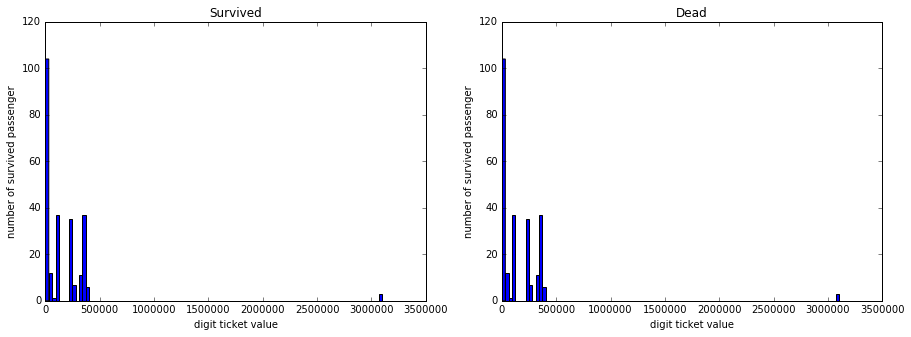

In [222]:
plt.figure(figsize=(15,5))
for idx, title in enumerate(["Survived", "Dead"], start=1):
    plt.subplot(1,2,idx)
    plt.title(title)
    plt.xlabel("digit ticket value")
    plt.ylabel("number of survived passenger")
    plt.hist(ticketdata[ticketdata[:,0]==1][:, 1], bins=np.arange(ticketdata[:,1].min(), ticketdata[:,1].max(), (ticketdata[:,1].max()-ticketdata[:,1].min())/100))

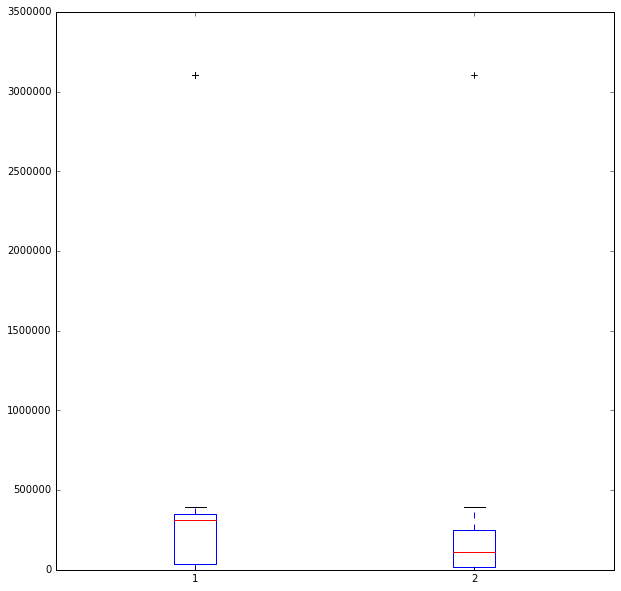

In [223]:
data_to_plot = [ticketdata[ticketdata[:,0]==i][:, 1] for i in range(2)]
plt.figure(figsize=(10,10))
bx = plt.boxplot(data_to_plot)

### Add additioncal feature "TicketCategory"
- `ticket_category` has 3 kinds of category
  1. non-digit(0) : ticket has string pre-fix or outlier value (ex. "S.O.C. 14879"," A/5 3536", 3101295)
  2. low-digit(1) : ticket is digit and not high value (ex. 2623, 5727)
  3. high-digit(2) : ticket is digit and high value (ex. 234686, 335097)

In [240]:
survive_median, dead_median, outlier_val = 111397.5, 315094.0, 3000000
is_non_digit = lambda v: not v.isdigit() or int(v) >= outlier_val
is_low_value = lambda v: abs(v-survive_median) < abs(v-dead_median)

low_digit_idx = lambda df: [not is_non_digit(ticket) and is_low_value(int(ticket)) for ticket in df.as_matrix()]
high_digit_idx = lambda df: [not is_non_digit(ticket) and not is_low_value(int(ticket)) for ticket in df.as_matrix()]
non_digit_idx = lambda df: [is_non_digit(ticket) for ticket in df.as_matrix()]

df_train.loc[non_digit_idx(df_train["Ticket"]), "TicketCategory"] = 0
df_train.loc[low_digit_idx(df_train["Ticket"]), "TicketCategory"] = 1
df_train.loc[high_digit_idx(df_train["Ticket"]), "TicketCategory"] = 2
df_test.loc[non_digit_idx(df_test["Ticket"]), "TicketCategory"] = 0
df_test.loc[low_digit_idx(df_test["Ticket"]), "TicketCategory"] = 1
df_test.loc[high_digit_idx(df_test["Ticket"]), "TicketCategory"] = 2

In [242]:
df_trainX = df_train.drop(["PassengerId", "Survived","Name", "Ticket", "Cabin"], axis=1)
df_testX = df_test.drop(["PassengerId","Name", "Ticket", "Cabin"], axis=1)

from keras.utils import np_utils
trainX = df_trainX.as_matrix()
testX = df_testX.as_matrix()
trainy = df_train["Survived"].as_matrix()
trainY = np_utils.to_categorical(trainy, 2)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest = forest.fit(trainX, trainY)

import numpy as np
prediction = forest.predict(trainX)
correct_num = len([match for match in np.argmax(prediction, axis=1) == trainy if match])
correct_rate = correct_num * 1.0 / trainX.shape[0]
print "Accuracy on training set = %f" % correct_rate

feature_names = list(df_trainX.columns.values)
for name, importance in zip(feature_names, forest.feature_importances_):
    print "%s = %f" % (name, importance)

test_prediction = forest.predict(testX)
one_hot = np.argmax(test_prediction, axis=1)
test_passenger_ids = df_test["PassengerId"].as_matrix()
ans = [[pid, pred] for pid, pred in zip(test_passenger_ids, one_hot)]
np.savetxt("forest_ans2.csv", np.array(ans), fmt="%d", delimiter=",",header="PassengerId,Survived")

Accuracy on training set = 0.969697
Pclass = 0.075331
Sex = 0.259887
Age = 0.264048
SibSp = 0.061504
Parch = 0.032966
Fare = 0.240190
Embarked = 0.033114
TicketCategory = 0.032959


`>>> score is 0.71770`